## Brief Summary for Fourier Transform

### Basic Properties

**Reference:** [Source](https://faculty.washington.edu/tadg/BEE235S10/Lessons/Week%207/LessonWeek7.pdf)

The Fourier Transform possesses several fundamental properties that facilitate signal analysis and manipulation. Below are some key properties:

- **Linearity**  
  The Fourier Transform of a linear combination of functions follows the same linearity principle:
  $$
  F(ax_1(t) + bx_2(t)) = aF(x_1(t)) + bF(x_2(t)) = aX_1(\omega) + bX_2(\omega)
  $$

- **Scaling**  
  Scaling in the time domain affects both the amplitude and frequency in the Fourier domain:
  $$
  x(at) \longleftrightarrow \frac{1}{|a|}X\left(\frac{\omega}{a}\right)
  $$

- **Time Shifting**  
  A time shift in the original function introduces a phase shift in the frequency domain:
  $$
  F(x(t - t_0)) = e^{-i \omega t_0} F(x(t))
  $$

- **Duality**  
  The Fourier Transform of a function and its inverse relationship follow the duality principle:
  $$
  x(t) \longleftrightarrow X(\omega)
  $$
  $$
  X(t) \longleftrightarrow 2\pi \cdot x(-\omega)
  $$

> **Note:**  
> The factor $2\pi$ in the duality property depends on the choice of normalization.

### Advanced Properties

**Reference:** [Source](https://faculty.washington.edu/tadg/BEE235S10/Lessons/Week%207/LessonWeek7.pdf)

Beyond the basic properties, Fourier Transform exhibits advanced properties that are crucial for signal processing:

- **Multiplication (Modulation Property)**  
  The multiplication of two functions in the time domain corresponds to their convolution in the frequency domain:
  $$
  p(t) \cdot q(t) \longleftrightarrow P(f) * Q(f)
  $$

- **Convolution**  
  The convolution of two signals in the time domain is equivalent to their multiplication in the frequency domain:
  $$
  p(t) * q(t) \longleftrightarrow P(f) \cdot Q(f)
  $$

- **Frequency Shifting**  
  Shifting a function in the frequency domain corresponds to modulation in the time domain:
  $$
  X(\omega - \omega_0) \longleftrightarrow x(t)e^{i \omega_0 t}
  $$

Here, $*$ represents the convolution operator, while $\cdot$ denotes multiplication.

### Sampling and Aliasing

Given a continuous signal $x(t)$, the corresponding discrete-time signal is expressed as:

$$
x_{\text{sampled}}(t) = x(t) \cdot s(t)
$$

where $s(t)$ is the Dirac comb function, defined as:

$$
s(t) = \sum_{n=-\infty}^{\infty} \delta(t - nT_s)
$$

where $T_s$ is the sampling interval.

#### Fourier Transform of Sampled Signal  

By the multiplication property of the Fourier Transform, multiplication in the time domain corresponds to convolution in the frequency domain:

$$
x_s(t) = x(t) \cdot s(t) \Longleftrightarrow X_s(f) = X(f) * S(f)
$$

The Fourier transform of $s(t)$ (proof omitted for now 😅) is given by:

$$
S(f) = f_s \sum_{k=-\infty}^{\infty} \delta(f - k f_s)
$$

Thus, the sampled signal's Fourier Transform becomes:

$$
X_s(f) = X(f) * \left( f_s \sum_{k=-\infty}^{\infty} \delta(f - k f_s) \right)
$$

Evaluating the convolution gives:

$$
X_s(f) = f_s \sum_{k=-\infty}^{\infty} X(f - k f_s)
$$

#### Key Observations  

- $X_s(f)$ is a **periodic** function with period $f_s$.
- It consists of shifted copies of $X(f)$, specifically $[X(f), X(f+f_s), X(f-f_s), \dots]$.
- If $X(f \pm kf_s) \neq 0$ for $k \in \{1,2,3,\dots\}$, then $X_s(f) \neq X(f)$, leading to **aliasing**.

### Windowing and Spectral Leakage

To analyze signals in a finite domain, we apply a windowing function. Ideally we consider a pure sinusoidal signal:

$$
x(t) = \sin(2\pi f_0 t)
$$

Applying a window function to restrict the signal to a finite duration:

$$
x_T(t) = x(t) \cdot w_T(t) \Longleftrightarrow X_T(f) = X(f) * W_T(f)
$$

Since $x(t)$ is a pure frequency component, its Fourier transform is a Dirac delta function centered at $f_0$:

$$
X(f) = \delta(f - f_0)
$$

Similarly, the window function $w_T(t)$ has a sinc-shaped Fourier Transform $W_T(f)$:

$$
X_T(f) = \delta(f \pm f_0) * \left[ T \cdot \text{sinc}(\pi f T) \right] = T \cdot \text{sinc}(\pi (f \pm f_0) T)
$$

#### Implications

For any **finite-length** signal, the Fourier Transform introduces convolution effects, which can result in **spectral leakage**:

- If $f_0$ aligns perfectly with a frequency bin, the sinc function contributes only at $f_0$, causing no leakage.
- If $f_0$ is not aligned with the frequency bins, adjacent frequencies receive nonzero contributions from the sinc function, leading to **spectral leakage**.

# Numerical Demonstration

## Matrix Representation of the Discrete Fourier Transform (DFT)

### Definition of DFT and iDFT

The Discrete Fourier Transform (DFT) and its inverse (iDFT) are defined as follows:

$$
f_n = \frac{1}{\sqrt{N}} \sum_{k=0}^{N-1}{F_k \cdot e^{i 2\pi k \frac{n}{N}}}, \quad n \in [0, N-1]
$$

$$
F_k = \frac{1}{\sqrt{N}} \sum_{n=0}^{N-1}{f_n \cdot e^{-i 2\pi k \frac{n}{N}}}, \quad k \in [0, N-1]
$$

where:

- $F_k$ represents the frequency-domain coefficients.
- $f_n$ denotes the time-domain (or space-domain) signal.

### Matrix Representation of DFT and iDFT

For numerical implementation, the DFT and iDFT can be conveniently expressed in matrix form.

We define the DFT matrix $\mathbf{W}$ and the iDFT matrix $\mathbf{W^T}$ as:

$$
\mathbf{W}_{nk} = \frac{1}{\sqrt{N}} e^{-i 2\pi k \frac{n}{N}}
$$

$$
\mathbf{W^T}_{nk} = \mathbf{\overline{W}}_{nk} = \frac{1}{\sqrt{N}} e^{i 2\pi k \frac{n}{N}}
$$

Using this notation, the forward and inverse DFT can be represented as matrix multiplications:

$$
\mathbf{f} = \mathbf{W^T} \mathbf{F}
$$

$$
\mathbf{F} = \mathbf{W} \mathbf{f}
$$

#### Structure of the DFT and iDFT Matrices

The elements of the matrices $\mathbf{W}$ and $\mathbf{W^T}$ are as follows:

> **DFT Matrix Representation:**
> $$
> \mathbf{W} = \frac{1}{\sqrt{N}}
> \begin{bmatrix}
> e^{-i 2\pi \cdot 0 \cdot \frac{0}{N}} & e^{-i 2\pi \cdot 0 \cdot \frac{1}{N}} & \dots & e^{-i 2\pi \cdot 0 \cdot \frac{N-1}{N}} \\
> e^{-i 2\pi \cdot 1 \cdot \frac{0}{N}} & e^{-i 2\pi \cdot 1 \cdot \frac{1}{N}} & \dots & e^{-i 2\pi \cdot 1 \cdot \frac{N-1}{N}} \\
> \vdots & \vdots & \ddots & \vdots \\
> e^{-i 2\pi \cdot (N-1) \cdot \frac{0}{N}} & e^{-i 2\pi \cdot (N-1) \cdot \frac{1}{N}} & \dots & e^{-i 2\pi \cdot (N-1) \cdot \frac{N-1}{N}}
> \end{bmatrix}
> $$

> **Inverse DFT (iDFT) Matrix Representation:**
> $$
> \mathbf{W^T} = \frac{1}{\sqrt{N}}
> \begin{bmatrix}
> e^{i 2\pi \cdot 0 \cdot \frac{0}{N}} & e^{i 2\pi \cdot 0 \cdot \frac{1}{N}} & \dots & e^{i 2\pi \cdot 0 \cdot \frac{N-1}{N}} \\
> e^{i 2\pi \cdot 1 \cdot \frac{0}{N}} & e^{i 2\pi \cdot 1 \cdot \frac{1}{N}} & \dots & e^{i 2\pi \cdot 1 \cdot \frac{N-1}{N}} \\
> \vdots & \vdots & \ddots & \vdots \\
> e^{i 2\pi \cdot (N-1) \cdot \frac{0}{N}} & e^{i 2\pi \cdot (N-1) \cdot \frac{1}{N}} & \dots & e^{i 2\pi \cdot (N-1) \cdot \frac{N-1}{N}}
> \end{bmatrix}
> $$

## Library

In [1646]:
import numpy as np
import matplotlib.pyplot as plt
import unittest

## Definition

### Helper Function

In [1647]:
def fftfreq(n: int, d: int, shift: bool = False) -> np.ndarray:
    """
    Compute the discrete Fourier Transform sample frequencies.

    Parameters:
        n (int): Number of points in the Fourier transform.
        d (int): Sample spacing (inverse of tfe sampling rate).
        shift (bool, optional): Whether to shift the zero frequency to the center. Defaults to False.

    Returns:
        np.ndarray: Array of frequency values.
    """
    modes = np.arange(np.ceil(-n / 2), np.ceil(n / 2), 1)
    total_spacing = n * d

    if not shift:
        modes = np.roll(modes, np.ceil(len(modes) / 2))

    wavenumber = modes / total_spacing
    return wavenumber


def fftshift(signal: np.ndarray) -> np.ndarray:
    """
    Shift the zero-frequency component to the center of the spectrum.

    Parameters:
        signal (np.ndarray): Input array representing the Fourier-transformed data.

    Returns:
        np.ndarray: Shifted array with zero frequency centered.
    """
    shift = tuple(int(np.floor(dim / 2)) for dim in np.shape(signal))
    axis = tuple(range(signal.ndim))

    return np.roll(signal, shift, axis)


def ifftshift(signal: np.ndarray) -> np.ndarray:
    """
    Inverse shift of the zero-frequency component to its original position.

    Parameters:
        signal (np.ndarray): Input array that has been shifted by `fftshift`.

    Returns:
        np.ndarray: Array with zero frequency moved back to its original location.
    """
    shift = tuple(-int(np.floor(dim / 2)) for dim in np.shape(signal))
    axis = tuple(range(signal.ndim))
    return np.roll(signal, shift, axis)

### DFT & iDFT

In [1648]:
def DFT(signal: np.ndarray) -> np.ndarray:
    """
    Compute the Discrete Fourier Transform (DFT) of a given signal.

    Args:
        signal (np.ndarray): Input signal, a 1D array of complex or real values.

    Returns:
        np.ndarray: The transformed signal in the frequency domain.
    """
    N = len(signal)
    sample_indices = np.arange(N) / N

    wavenumbers = np.arange(N).reshape((N, 1))

    bases = np.exp(-1j * 2 * np.pi * wavenumbers * sample_indices)

    return np.dot(bases, signal) / np.sqrt(N)


def iDFT(spectrum: np.ndarray) -> np.ndarray:
    """
    Compute the Inverse Discrete Fourier Transform (iDFT) of a given frequency spectrum.

    Args:
        spectrum (np.ndarray): Input spectrum, a 1D array of complex frequency components.

    Returns:
        np.ndarray: The reconstructed time-domain signal.
    """
    N = len(spectrum)
    sample_indices = np.arange(N) / N

    wavenumbers = np.arange(N).reshape((N, 1))

    bases = np.exp(1j * 2 * np.pi * wavenumbers * sample_indices)

    return np.dot(bases, spectrum) / np.sqrt(N)

## Unit Test

In [1649]:
class BasicTest_FourierAnalysis(unittest.TestCase):
    def test_fftfreq(self):
        for N in np.random.randint(128, 256, size=100):
            with self.subTest(N=N):
                self.assertTrue(
                    np.allclose(fftfreq(N, 1 / N), np.fft.fftfreq(N, 1 / N)),
                    f"fftfreq failed for N={N}",
                )

    def test_fftshift(self):
        for N in np.random.randint(128, 256, size=100):
            signal = np.arange(N)
            with self.subTest(N=N):
                self.assertTrue(
                    np.allclose(fftshift(signal), np.fft.fftshift(signal)),
                    f"fftshift failed for N={N}",
                )
                self.assertTrue(
                    np.allclose(ifftshift(signal), np.fft.ifftshift(signal)),
                    f"ifftshift failed for N={N}",
                )

    def test_DFT_iDFT(self):
        for N in np.random.randint(128, 256, size=100):
            time = np.linspace(0, 1 + np.random.rand(), N, endpoint=False)
            signal = np.exp(-1j * 2 * np.pi * 0 * time).real
            for wavenumber in np.random.randint(1, 10, size=2):
                signal += (1 / wavenumber) * np.exp(
                    -1j * 2 * np.pi * wavenumber * time
                ).real
            signal += np.random.normal(loc=0, scale=0.5, size=np.shape(signal))
            with self.subTest(N=N):
                self.assertTrue(
                    np.allclose(np.fft.fft(signal, norm="ortho"), DFT(signal)),
                    f"DFT failed for N={N}",
                )
                self.assertTrue(
                    np.allclose(np.fft.ifft(signal, norm="ortho"), iDFT(signal)),
                    f"iDFT failed for N={N}",
                )

## Main

In [1650]:
if __name__ == "__main__":
    unittest.main(argv=["first-arg-is-ignored"], exit=False, verbosity=3)

test_DFT_iDFT (__main__.BasicTest_FourierAnalysis.test_DFT_iDFT) ... ok
test_fftfreq (__main__.BasicTest_FourierAnalysis.test_fftfreq) ... ok
test_fftshift (__main__.BasicTest_FourierAnalysis.test_fftshift) ... ok

----------------------------------------------------------------------
Ran 3 tests in 0.496s

OK


## Misc

In [1651]:
class Demonstration_FourierAnalysis:
    def __init__(self):
        pass

    def display_power_phase_spectrum(self):
        """
        Computes and displays the power and phase spectrum of a synthesized signal.

        The signal is constructed as a sum of sinusoids with both significant and
        negligible frequency components. A Fourier Transform (FFT) is applied to
        analyze the frequency-domain representation.

        Plots:
            - Power Spectrum: Shows the magnitude squared of the FFT components.
            - Phase Spectrum: Displays the phase angle of the FFT components,
            highlighting significant frequencies.

        Parameters:
            None

        Returns:
            None: Displays the plots but does not return a value.
        """

        time = np.linspace(0, 1, 200, endpoint=False)
        signal = np.zeros_like(time, dtype=complex)

        # Select two unique significant frequencies randomly
        significant_freq = np.sort(
            np.random.choice(np.arange(-15, 15), size=3, replace=False)
        )
        significant_phase_angle = 0.5 * np.pi

        # Construct the signal with dominant and negligible frequency components
        for freq in np.arange(-30, 30, 1):
            magnitude = 1 if freq in significant_freq else 1e-6
            phase = significant_phase_angle if freq in significant_freq else 0.0
            signal += magnitude * np.exp(1j * (2 * np.pi * freq * time + phase))

        # Compute FFT and extract power and phase spectra
        frequencies = np.fft.fftfreq(signal.size, d=1 / signal.size)
        fft_signal = np.fft.fft(signal, norm="ortho")

        power_spectrum = np.abs(fft_signal) ** 2  # Compute power as |FFT|²
        phase_spectrum = np.rad2deg(
            np.angle(fft_signal)
        )  # Compute phase, convert to degrees

        bar_width = (
            frequencies[1] - frequencies[0]
        ) * 0.5  # Ensure consistent bar width

        # Create side-by-side subplots for power and phase spectra
        fig, axes = plt.subplots(1, 2, figsize=(16, 9), dpi=160, sharex=True)

        # Power spectrum plot
        axes[0].bar(frequencies, power_spectrum, width=bar_width, zorder=2)
        axes[0].grid(zorder=1)
        axes[0].set_title("Power Spectrum")
        axes[0].set_xlabel("Frequency")
        axes[0].set_ylabel("Power")

        # Phase spectrum plot
        axes[1].bar(frequencies, phase_spectrum, width=bar_width, zorder=2)

        # Highlight significant frequencies with a scatter plot
        axes[1].plot([-20, 20], [np.rad2deg(significant_phase_angle)] * 2, "r--")

        axes[1].grid(zorder=1)

        # Add reference lines for better visualization
        axes[1].plot(
            [0, 0], [-180, 180], "k-", lw=3, zorder=-1
        )  # Vertical reference line
        axes[1].plot(
            [-20, 20], [0, 0], "k-", lw=3, zorder=5
        )  # Horizontal reference line

        axes[1].set_title("Phase Spectrum")
        axes[1].set_xlabel("Frequency")
        axes[1].set_ylabel("Phase Angle (degrees)")
        axes[1].set_yticks(np.linspace(-180, 180, 9))
        axes[1].set_ylim(-180, 180)
        axes[1].set_xlim(-20, 20)

        fig.tight_layout()
        plt.show()

        return None

    def display_spectral_leakage(self):
        """
        Visualizes spectral leakage by comparing power spectra of signals
        with slightly different frequencies.

        The method generates two signals:
        1. A signal with a randomly chosen centered frequency.
        2. A similar signal with a slight frequency shift (spread frequency).

        It then computes and plots their power spectra using the FFT to
        illustrate the impact of frequency resolution and scalloping loss.

        Returns:
            None
        """

        time = np.linspace(0, 1, 41, endpoint=False)
        frequencies = np.fft.fftfreq(time.size, 1 / time.size)
        frequency_resolution = frequencies[1] - frequencies[0]
        Nyquist_frequency = np.max(np.abs(frequencies))

        centered_freq = np.random.choice(
            np.fft.fftshift(frequencies)[
                int(0.1 * frequencies.size) : -int(0.1 * frequencies.size)
            ]
        )
        spread_freq = centered_freq + frequency_resolution * 0.5

        signal_centered = np.zeros_like(time, dtype=float)
        signal_spread = np.zeros_like(time, dtype=float)

        for freq in frequencies:
            if freq == centered_freq:
                signal_centered += np.exp(1j * 2 * np.pi * centered_freq * time).real
                signal_spread += np.exp(1j * 2 * np.pi * spread_freq * time).real
            else:
                signal_centered += (
                    np.sqrt(2 / time.size) * np.exp(1j * 2 * np.pi * freq * time).real
                )
                signal_spread += (
                    np.sqrt(2 / time.size) * np.exp(1j * 2 * np.pi * freq * time).real
                )

        power_spectrum_centered = np.abs(np.fft.fft(signal_centered, norm="ortho")) ** 2
        power_spectrum_spread = np.abs(np.fft.fft(signal_spread, norm="ortho")) ** 2

        fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(16, 9), dpi=160)
        bar_width = (frequencies[1] - frequencies[0]) * 0.5

        ax.bar(
            frequencies,
            power_spectrum_centered,
            width=bar_width,
            label=f"{centered_freq} Hz",
            zorder=10,
        )
        ax.bar(
            frequencies,
            power_spectrum_spread,
            width=bar_width,
            label=f"{spread_freq} Hz",
            zorder=-1,
        )

        ax.legend()
        ax.set_xlabel("Frequency (Hz)")
        ax.set_ylabel("Power")
        ax.set_yscale("log")
        ax.set_yticks([1, 10, 100])

        fig.suptitle(
            f"Scalloping loss (orange area)\nFrequency resolution : {frequency_resolution} Hz\nNyquist frequency : {Nyquist_frequency} Hz"
        )

        fig.tight_layout()
        plt.show()

        return None

    def display_aliasing(self):
        sparse_time = np.linspace(0, 1, 10, endpoint=False)
        dense_time = np.linspace(0, 1, 20, endpoint=False)

        sparse_frequencies = np.fft.fftfreq(sparse_time.size, 1 / sparse_time.size)
        dense_frequencies = np.fft.fftfreq(dense_time.size, 1 / dense_time.size)
        resolved_frequency = np.random.choice(sparse_frequencies[1:-1], size=1)[-1]
        aliased_frequency = np.random.choice(
            np.setxor1d(sparse_frequencies, dense_frequencies)[1:-1], size=1
        )[-1]

        significant_frequencies = np.array([resolved_frequency, aliased_frequency])

        sparse_signal = np.zeros_like(sparse_time, dtype=complex)
        dense_signal = np.zeros_like(dense_time, dtype=complex)

        for freq in np.setdiff1d(sparse_frequencies, significant_frequencies):
            sparse_signal += np.sqrt(2 / len(sparse_time)) * np.exp(
                1j * 2 * np.pi * freq * sparse_time
            )
            dense_signal += np.sqrt(2 / len(dense_time)) * np.exp(
                1j * 2 * np.pi * freq * dense_time
            )
        for freq in significant_frequencies:
            sparse_signal += (
                10
                * np.sqrt(1 / len(sparse_time))
                * np.exp(1j * 2 * np.pi * freq * sparse_time)
            )
            dense_signal += (
                10
                * np.sqrt(1 / len(dense_time))
                * np.exp(1j * 2 * np.pi * freq * dense_time)
            )

        plt.figure(figsize=(16, 9), dpi=160)

        bar_width = 0.3
        plt.bar(
            np.fft.fftshift(dense_frequencies) - bar_width / 2,
            np.fft.fftshift(np.abs(np.fft.fft(dense_signal, norm="ortho")) ** 2),
            width=bar_width,
            label="oversample",
        )
        plt.bar(
            np.fft.fftshift(sparse_frequencies) + bar_width / 2,
            np.fft.fftshift(np.abs(np.fft.fft(sparse_signal, norm="ortho")) ** 2),
            width=bar_width,
            label="undersample",
        )
        plt.plot(
            [2 * np.min(dense_frequencies), 2 * np.max(dense_frequencies)],
            [100, 100],
            "k--",
        )
        plt.fill_betweenx(
            [0, 200],
            np.min(sparse_frequencies),
            np.max(sparse_frequencies),
            facecolor="red",
            alpha=0.1,
        )
        plt.fill_betweenx(
            [0, 200],
            10 * np.min(sparse_frequencies),
            np.min(sparse_frequencies),
            facecolor="gray",
            edgecolor="gray",
            alpha=0.3,
        )
        plt.fill_betweenx(
            [0, 200],
            np.max(sparse_frequencies),
            10 * np.max(sparse_frequencies),
            facecolor="gray",
            edgecolor="gray",
            alpha=0.3,
        )
        plt.legend(loc=1)
        plt.xticks(dense_frequencies)
        plt.yscale("log")
        plt.xlim(-10, 10)
        plt.ylim(1, 200)
        plt.xlabel("Frequency (Hz)")
        plt.ylabel("Power")

        plt.title(f"Aliasing")
        plt.show()
        return None

    def display_convolution(self):
        def primitive_convolution(signal: np.ndarray, kernel: np.ndarray, mode: str):
            padded_signal = np.pad(array=signal, pad_width=((0, kernel.size - 1),))
            padded_kernel = np.pad(array=kernel, pad_width=((0, signal.size - 1),))
            result = np.zeros_like(padded_signal, dtype=float)

            for index in range(result.size):
                result[index] = np.sum(
                    padded_signal * np.roll(np.flip(padded_kernel), index + 1)
                )

            if mode == "valid":
                return result[kernel.size - 1 : -(kernel.size - 1)]
            elif mode == "same":
                return result[
                    int(np.floor((kernel.size - 1) / 2)) : -int(
                        np.ceil((kernel.size - 1) / 2)
                    )
                ]
            elif mode == "full":
                return result
            else:
                return None

        def FFT_convolution(signal: np.ndarray, kernel: np.ndarray, mode: str):
            padded_signal = np.pad(array=signal, pad_width=((0, kernel.size - 1),))
            padded_kernel = np.pad(array=kernel, pad_width=((0, signal.size - 1),))
            if mode == "valid":
                return np.fft.ifft(
                    np.fft.fft(padded_signal) * np.fft.fft(padded_kernel)
                )[kernel.size - 1 : -(kernel.size - 1)]
            elif mode == "same":
                return np.fft.ifft(
                    np.fft.fft(padded_signal) * np.fft.fft(padded_kernel)
                )[
                    int(np.floor((kernel.size - 1) / 2)) : -int(
                        np.ceil((kernel.size - 1) / 2)
                    )
                ]
            elif mode == "full":
                return np.fft.ifft(
                    np.fft.fft(padded_signal) * np.fft.fft(padded_kernel)
                )
            else:
                return None

        length = 7
        time = np.linspace(0, 1, 200)
        signal = np.cumsum(np.random.normal(0.0, 0.05, size=(200,))) + 2.5
        kernel = np.ones(shape=(2 * length + 1,))
        kernel /= kernel.size

        plt.figure(figsize=(16, 9), dpi=160)
        plt.plot(time, signal, "k-", lw=3)
        plt.plot(
            time,
            np.convolve(signal, kernel, mode="same"),
            "b-.",
            lw=3,
            label="Numpy Official",
        )
        plt.plot(
            time,
            FFT_convolution(signal, kernel, mode="same").real,
            "r--",
            lw=3,
            label="FFT-based",
        )
        plt.plot(
            time,
            primitive_convolution(signal, kernel, mode="same"),
            "g:",
            lw=3,
            label="Direct Sum",
        )
        plt.fill_betweenx(
            [-10, 10],
            time[0],
            time[0 + length],
            facecolor="gray",
            edgecolor="white",
            alpha=0.5,
        )
        plt.fill_betweenx(
            [-10, 10],
            time[-1 - length],
            time[-1],
            facecolor="gray",
            edgecolor="white",
            alpha=0.5,
        )
        plt.legend(loc=1)
        plt.xlabel("Time")
        plt.ylabel("Amplitude")
        plt.xlim(0, 1)
        plt.ylim(0.5, 4.5)
        plt.title("Convolution\nThe effect of B.C. is visible")
        plt.show()

        return None

    def display_zero_padding(self):
        time = np.linspace(0, 5.0, 30, endpoint=False)
        signal = np.sin(2 * np.pi * 1.11 * time)
        signal += np.sin(2 * np.pi * 1.49 * time)
        signal += np.sin(2 * np.pi * 1.71 * time)

        padded_signal = np.pad(signal, (0, int(49 * len(signal))))

        spectrum = np.abs(np.fft.rfft(signal)) ** 2
        padded_spectrum = np.abs(np.fft.rfft(padded_signal)) ** 2

        plt.figure(figsize=(16, 9), dpi=160)

        plt.bar(
            np.fft.rfftfreq(signal.size, time[1] - time[0]),
            spectrum,
            width=0.03,
            zorder=10,
        )

        plt.bar(
            np.fft.rfftfreq(padded_signal.size, (time[1] - time[0])),
            padded_spectrum,
            width=0.003,
            zorder=-1,
        )

        plt.plot([1.11, 1.11], [0, 400], "r--", zorder=100)
        plt.plot([1.49, 1.49], [0, 400], "r--", zorder=100)
        plt.plot([1.71, 1.71], [0, 400], "r--", zorder=100)
        plt.xlim(0.8, 2.2)
        plt.ylim(0, 400)
        plt.xlabel("Frequency (Hz)")
        plt.ylabel("Power")
        plt.title(
            "Zero Padding in time $\Longleftrightarrow$ Moving Average in frequency"
        )
        plt.show()

        return None

    def display_derivative(self):
        """
        https://math.mit.edu/%7Estevenj/fft-deriv.pdf

        https://github.com/andgoldschmidt/derivative
        """

        def FFT_derivative(
            signal: np.ndarray, domain: np.ndarray, cutoff_freq: float = np.inf
        ) -> np.ndarray:
            """
            Compute the first derivative of a signal using FFT-based differentiation.
            """
            L = signal.size * (domain[1] - domain[0])
            frequency = np.fft.fftfreq(n=signal.size, d=1 / signal.size)
            frequency = np.where(np.abs(frequency) < cutoff_freq, frequency, 0)
            # Construct the differentiation filter in the frequency domain
            discrete_derivative_filter = 1j * 2 * np.pi * frequency / L

            return np.fft.ifft(np.fft.fft(signal) * discrete_derivative_filter)

        cutoff_freq = 50
        time = 2 * np.pi * np.linspace(0, 2, 400, endpoint=False)
        signal = np.zeros_like(time)
        signal_derivative = np.zeros_like(time)
        for _ in range(5):
            random_frequency = np.random.randint(2, 20) + np.random.rand()
            signal += np.sin(random_frequency * time)
            signal_derivative += random_frequency * np.cos(random_frequency * time)

        print(
            f"Spectral-without-filter      , L2 Norm = {np.sum((signal_derivative - FFT_derivative(signal, time).real) ** 2):10.2f}"
        )
        print(
            f"Spectral-with-filter         , L2 Norm = {np.sum(
                (signal_derivative - FFT_derivative(signal, time, cutoff_freq).real)
                ** 2
            ):10.2f}"
        )
        print(
            f"2nd Central Finite Difference, L2 Norm = {np.sum(
                (signal_derivative - signal_derivative - np.gradient(signal, time)) ** 2
            ):10.2f}"
        )
        plt.figure(figsize=(16, 9), dpi=160)
        plt.plot(
            time / (2 * np.pi),
            signal_derivative - FFT_derivative(signal, time).real,
            "r--",
            label="spectral",
        )
        plt.plot(
            time / (2 * np.pi),
            signal_derivative - FFT_derivative(signal, time, cutoff_freq).real,
            "g--",
            label=f"spectral-filter-{cutoff_freq}",
        )
        plt.plot(
            time / (2 * np.pi),
            signal_derivative - np.gradient(signal, time),
            "b-.",
            label="finite_difference",
        )
        plt.legend(loc=2)
        plt.xlabel("Time")
        plt.ylabel("Error")
        plt.title("Derivative of discrete signal")
        plt.show()

        return None

    def display_interpolation(self):
        def FFT_roll(signal: np.ndarray, shift: int = 0) -> np.ndarray:
            frequency = np.fft.fftfreq(n=signal.size, d=1 / signal.size)
            shift_operator = np.exp(1j * 2 * np.pi * frequency * (shift / signal.size))
            return np.fft.ifft(np.fft.fft(signal) * shift_operator)

        def FFT_2nd_central_difference(signal: np.ndarray) -> np.ndarray:
            frequency = np.fft.fftfreq(n=signal.size, d=1 / signal.size)
            difference_operator = (
                np.exp(1j * 2 * np.pi * frequency * (1 / signal.size))
                - np.exp(1j * 2 * np.pi * frequency * (-1 / signal.size))
            ) / 2
            return np.fft.ifft(np.fft.fft(signal) * difference_operator)

        signal = np.cumsum(np.random.normal(0, 1, size=(100,)))

        plt.figure(figsize=(16, 9), dpi=160)
        plt.plot(np.gradient(signal), "b-", label="np.gradient()")
        plt.plot(
            (np.roll(signal, -1) - np.roll(signal, 1)) / 2, "r-", label="np.roll()"
        )
        plt.plot(FFT_2nd_central_difference(signal).real, "k:", label="FFT-based")
        plt.fill_betweenx(
            [-10, 10],
            0,
            1,
            facecolor="gray",
            edgecolor="white",
            alpha=0.5,
        )
        plt.fill_betweenx(
            [-10, 10],
            98,
            99,
            facecolor="gray",
            edgecolor="white",
            alpha=0.5,
        )
        plt.legend()
        plt.xlim(0, 99)
        plt.ylim(-3, 3)
        plt.xlabel("Data points")
        plt.ylabel("Value")
        plt.title(
            "Shift data $\Longleftrightarrow$ Multiply $e^{ik\\frac{shift}{L}}$ in frequency"
        )
        plt.show()
        return None

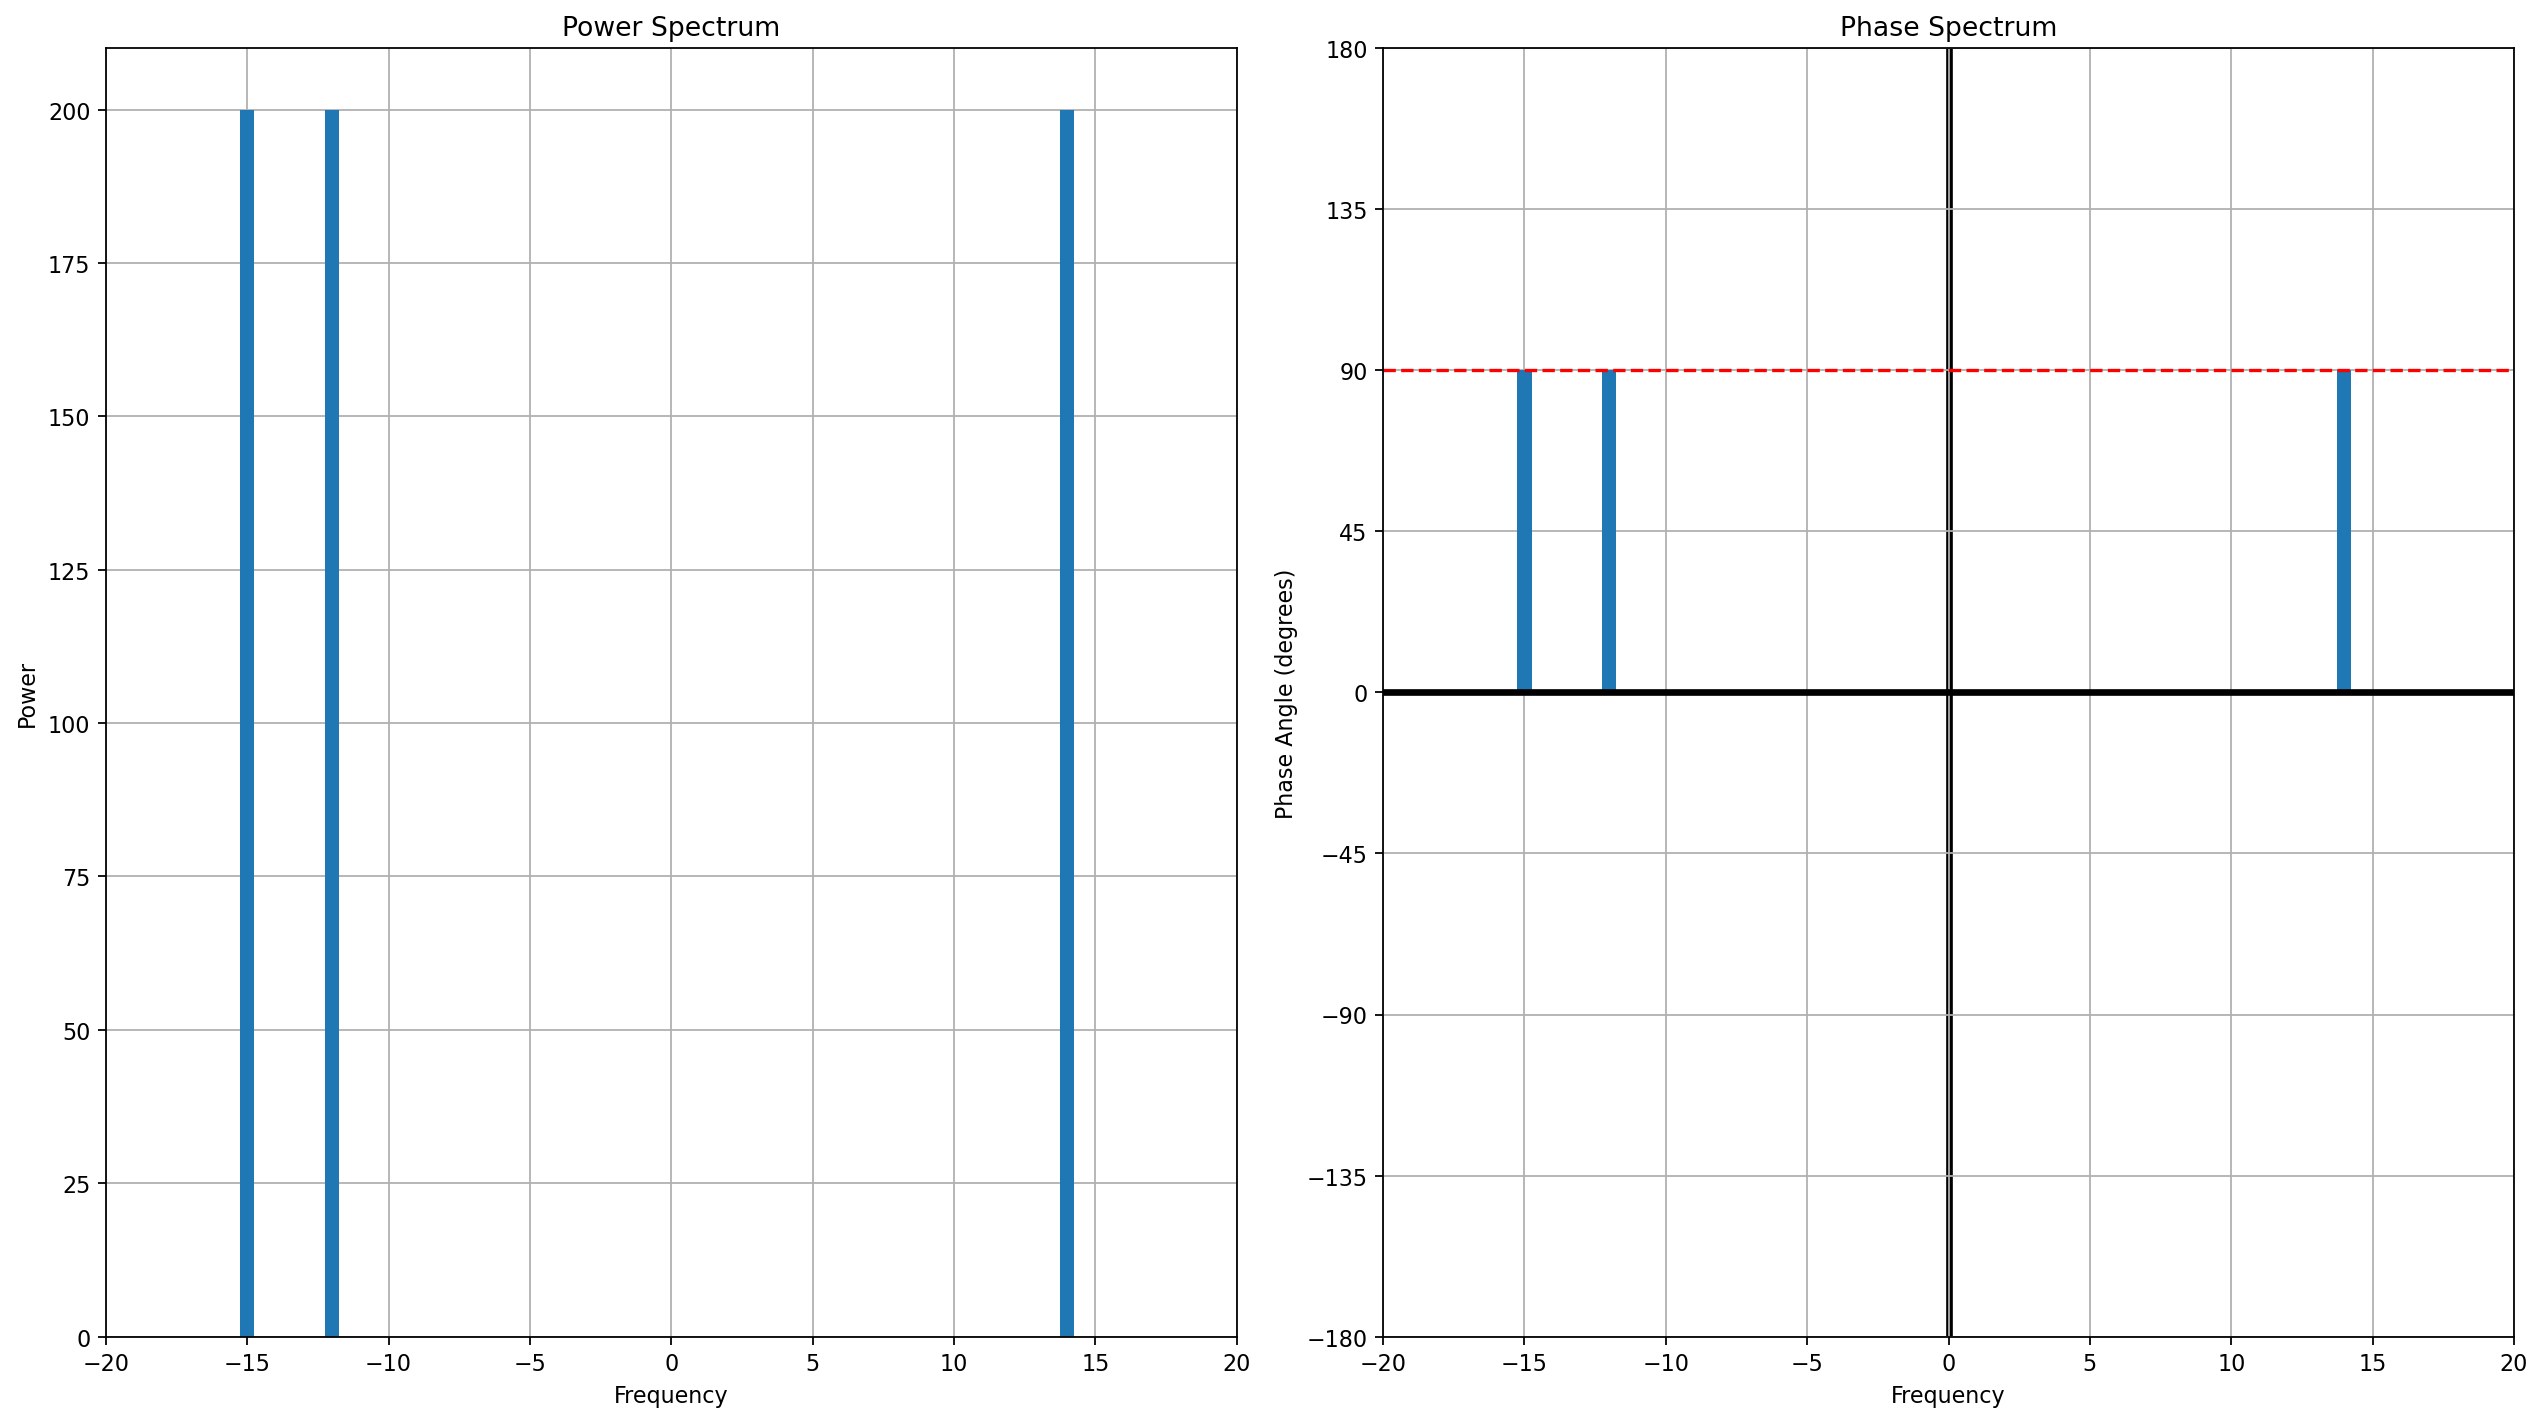

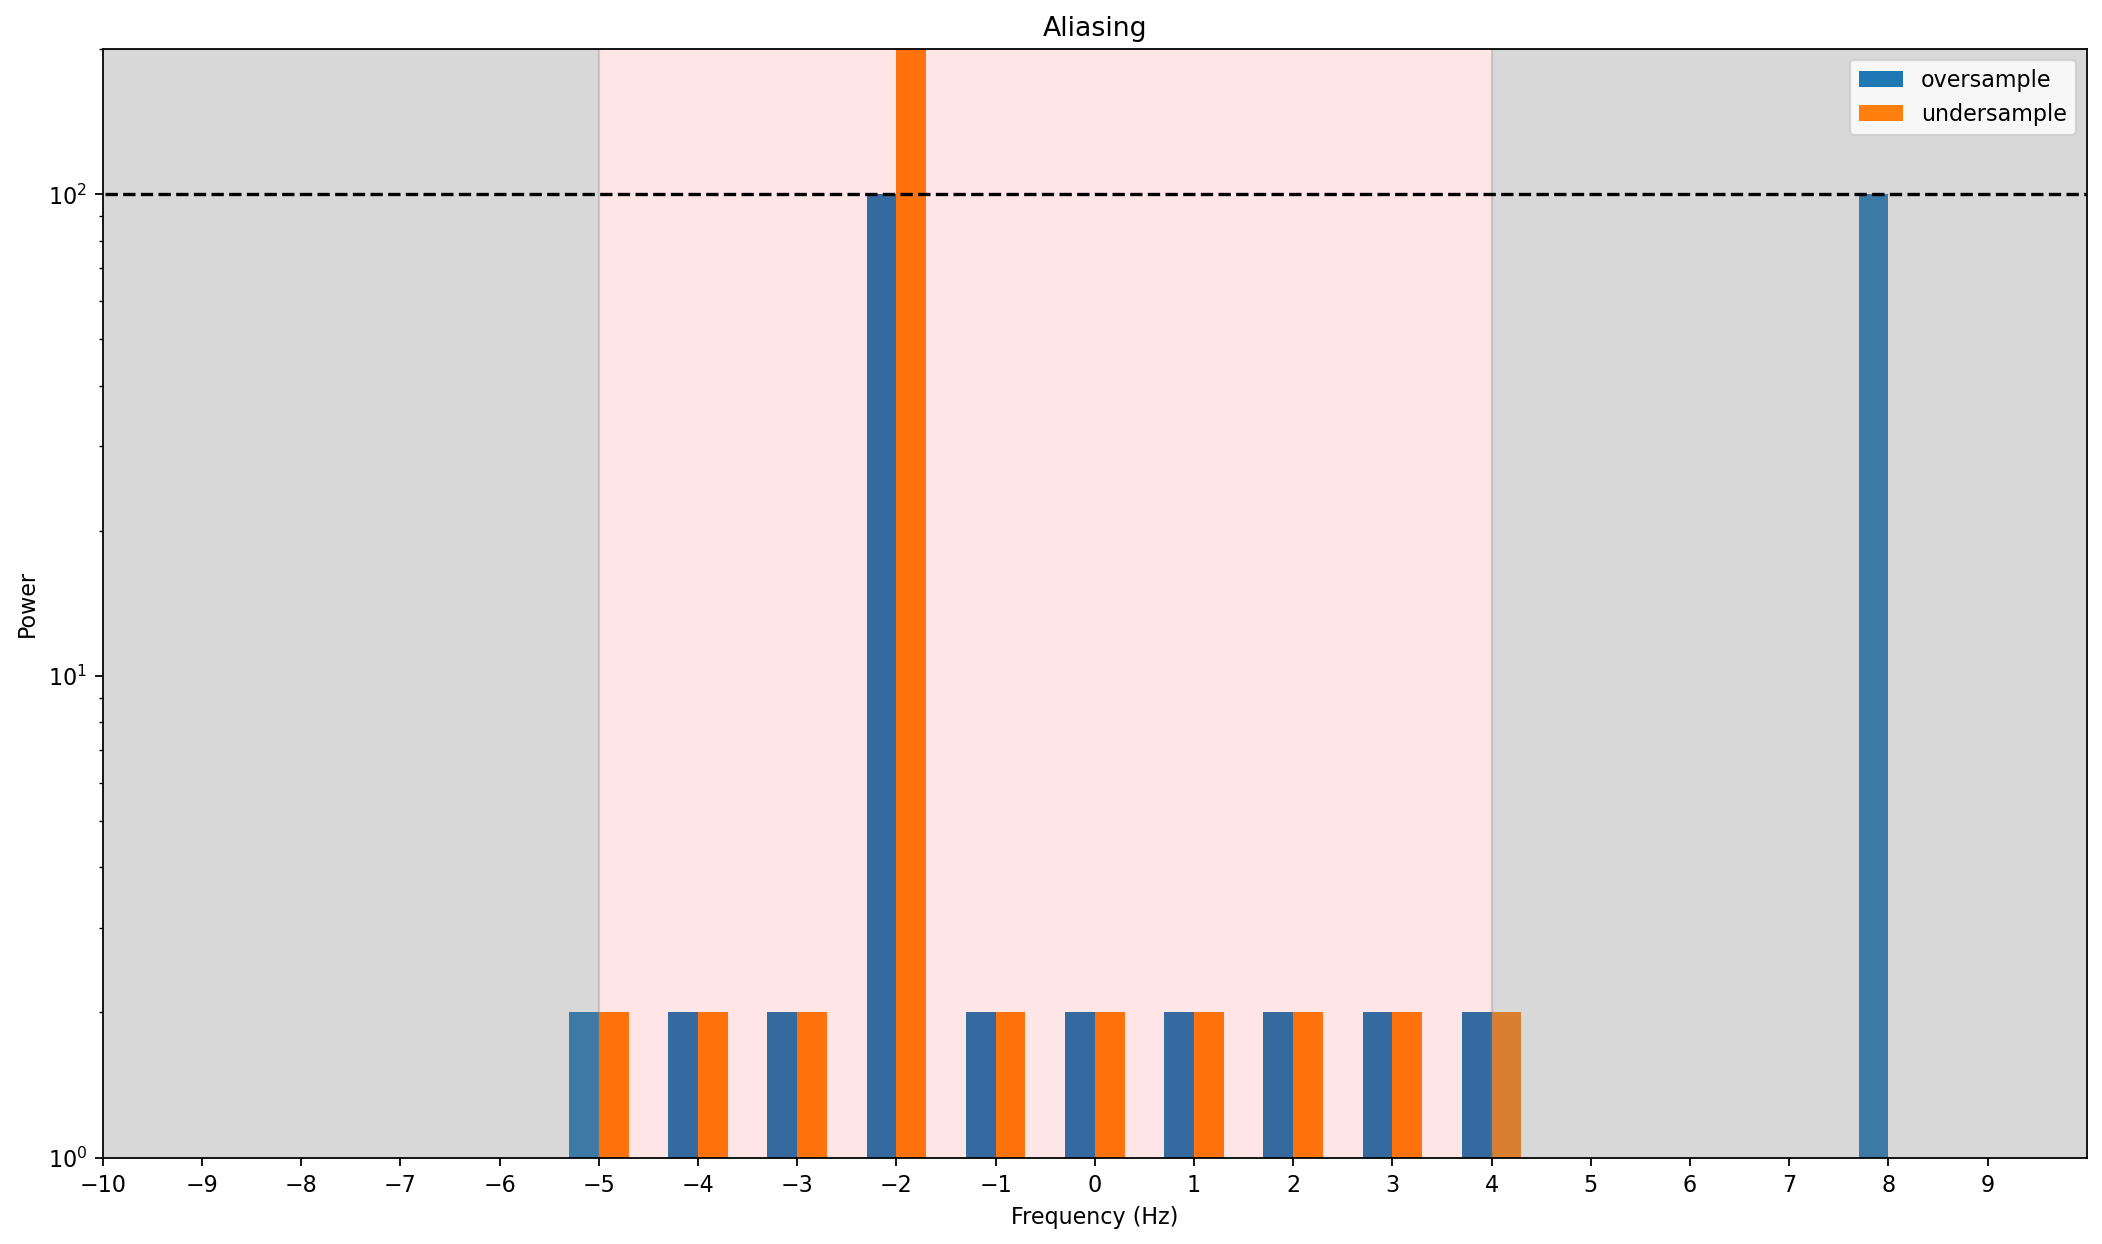

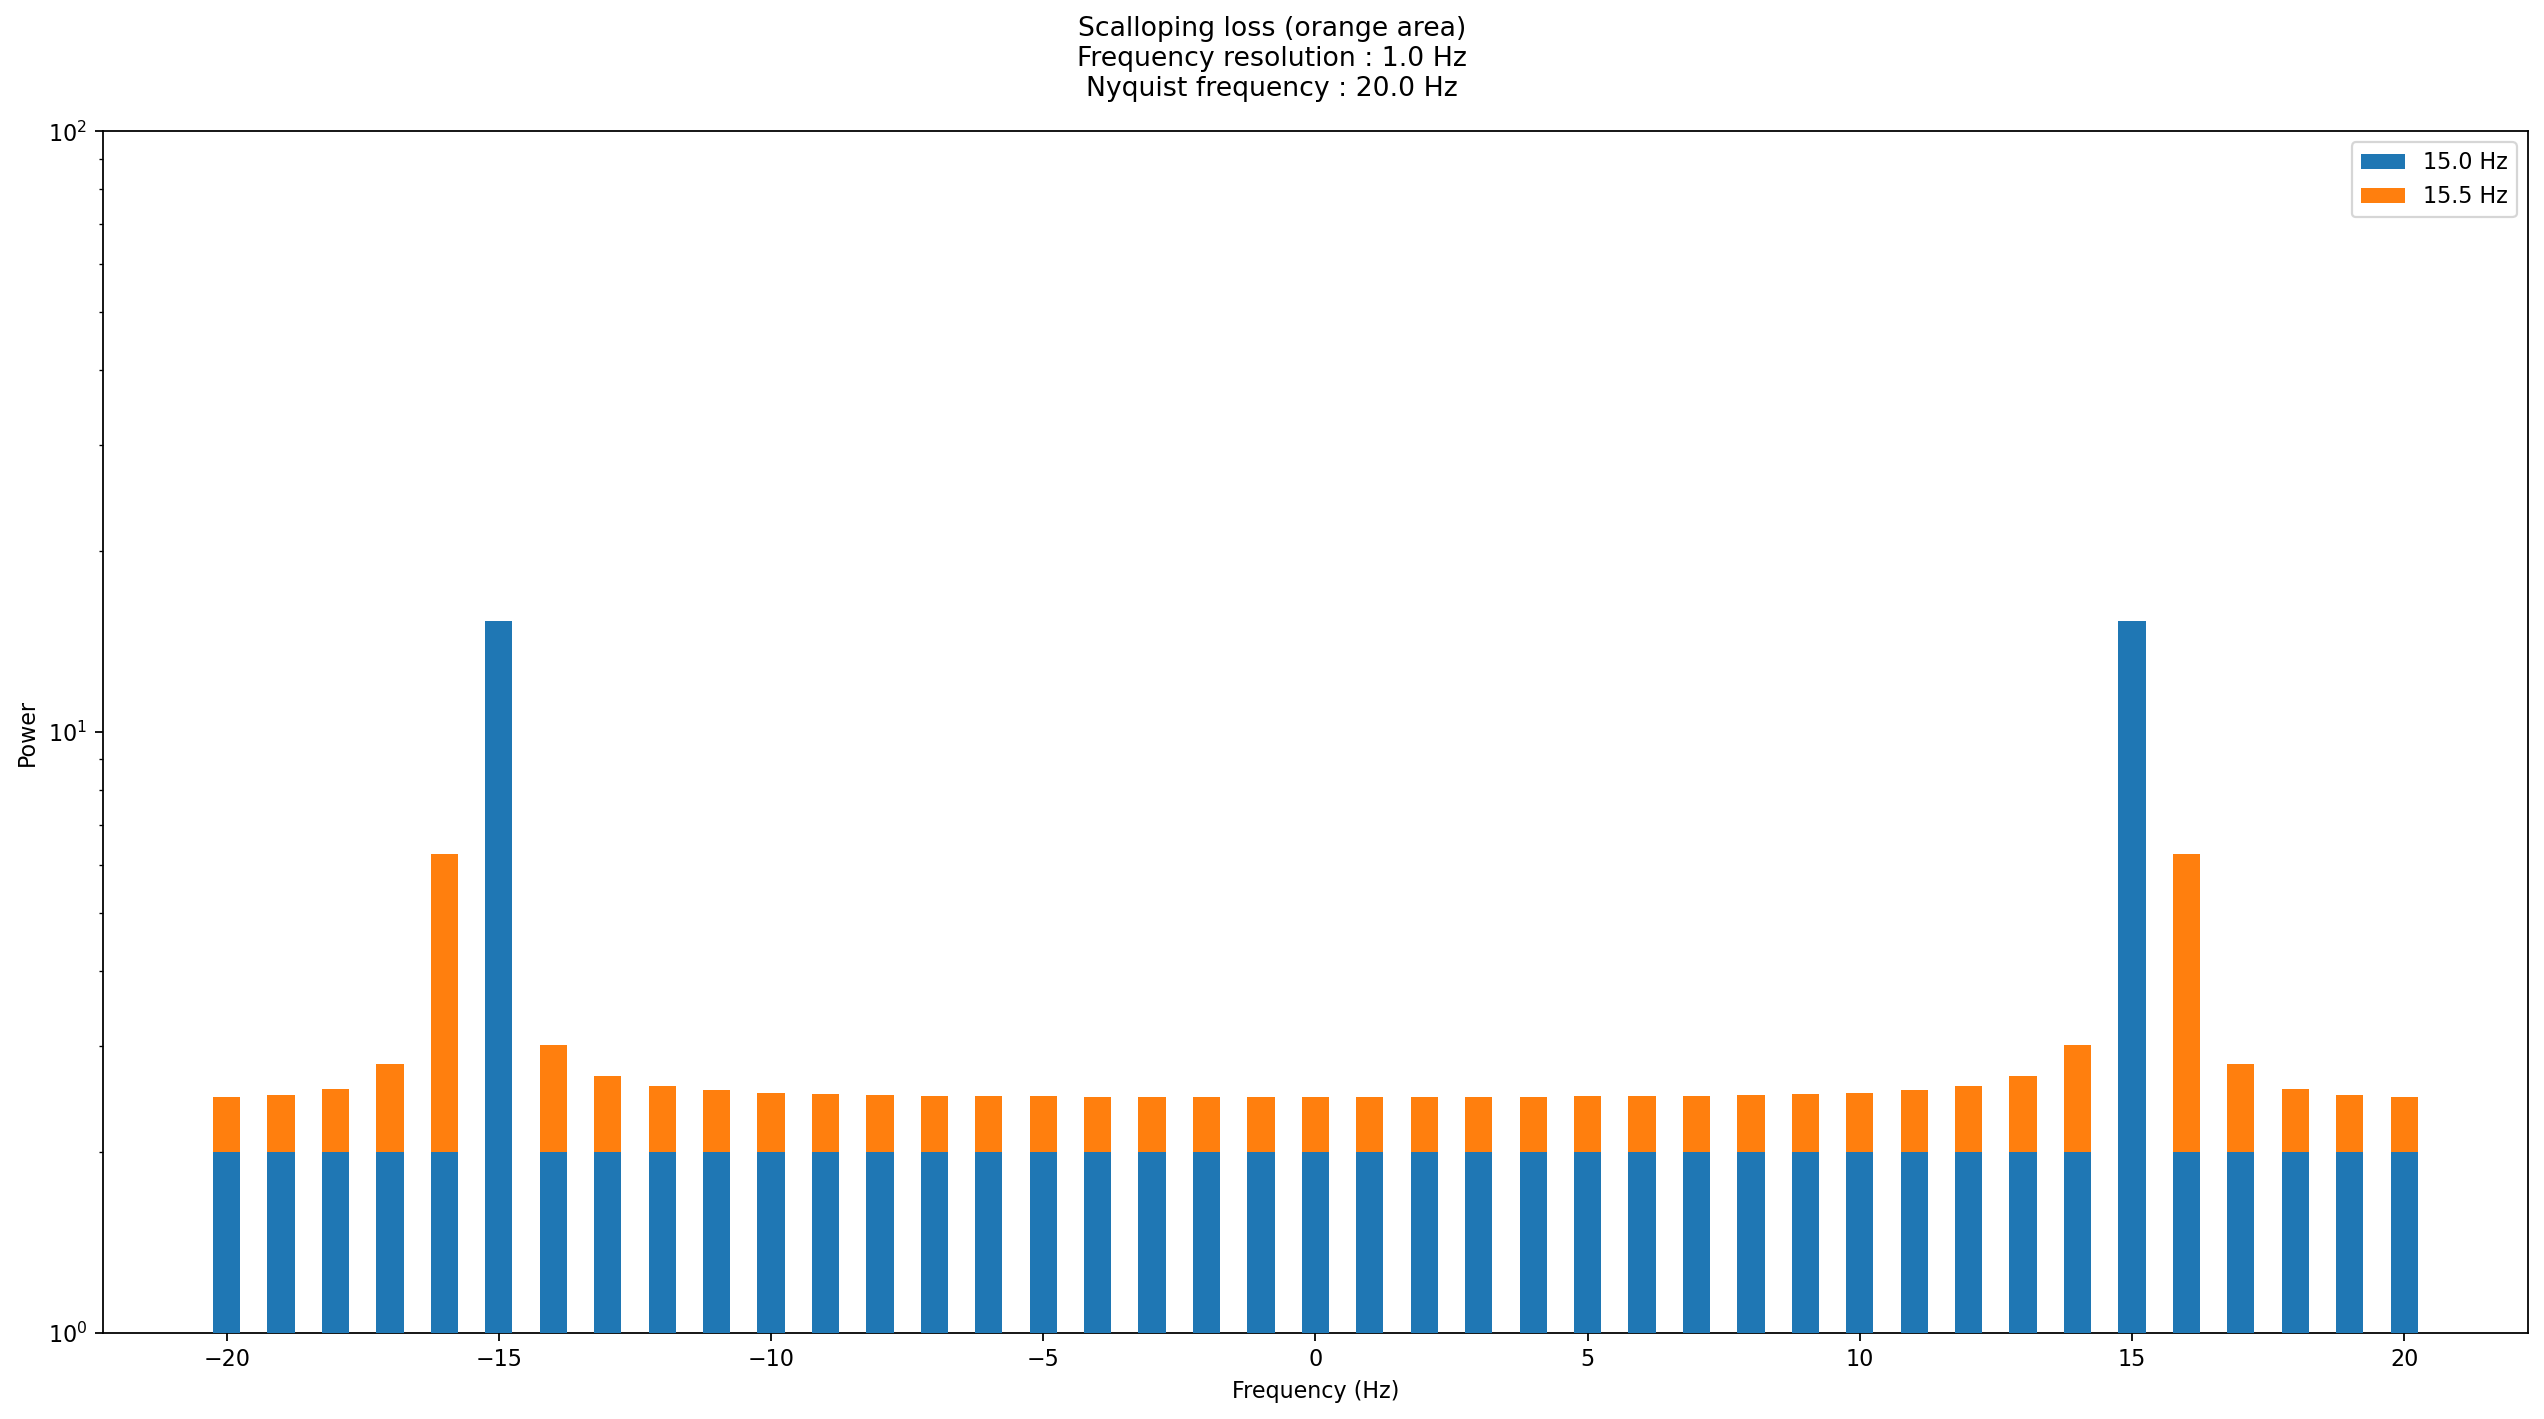

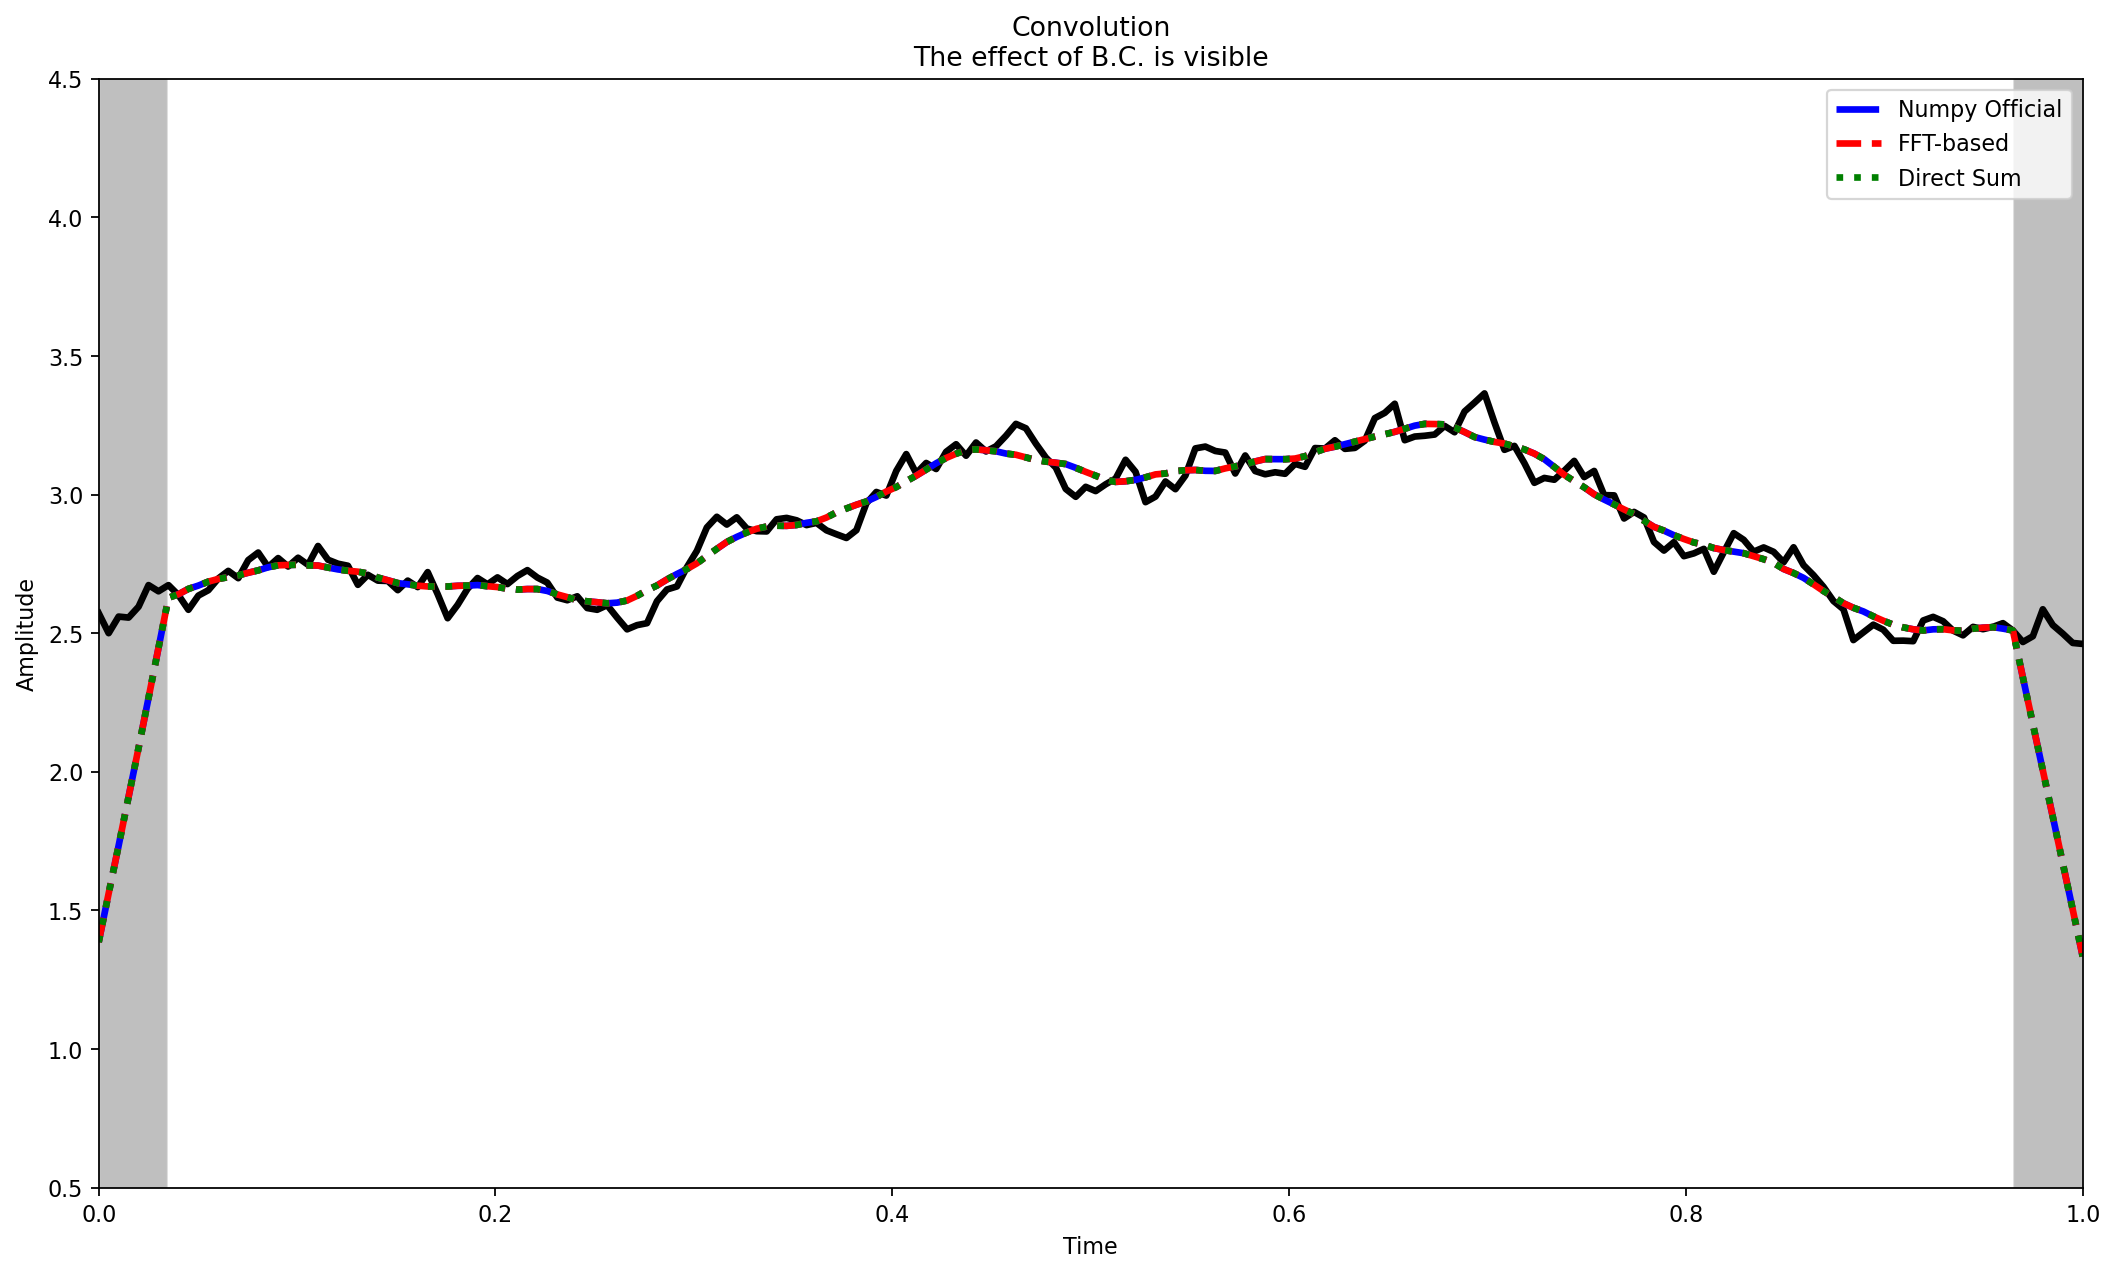

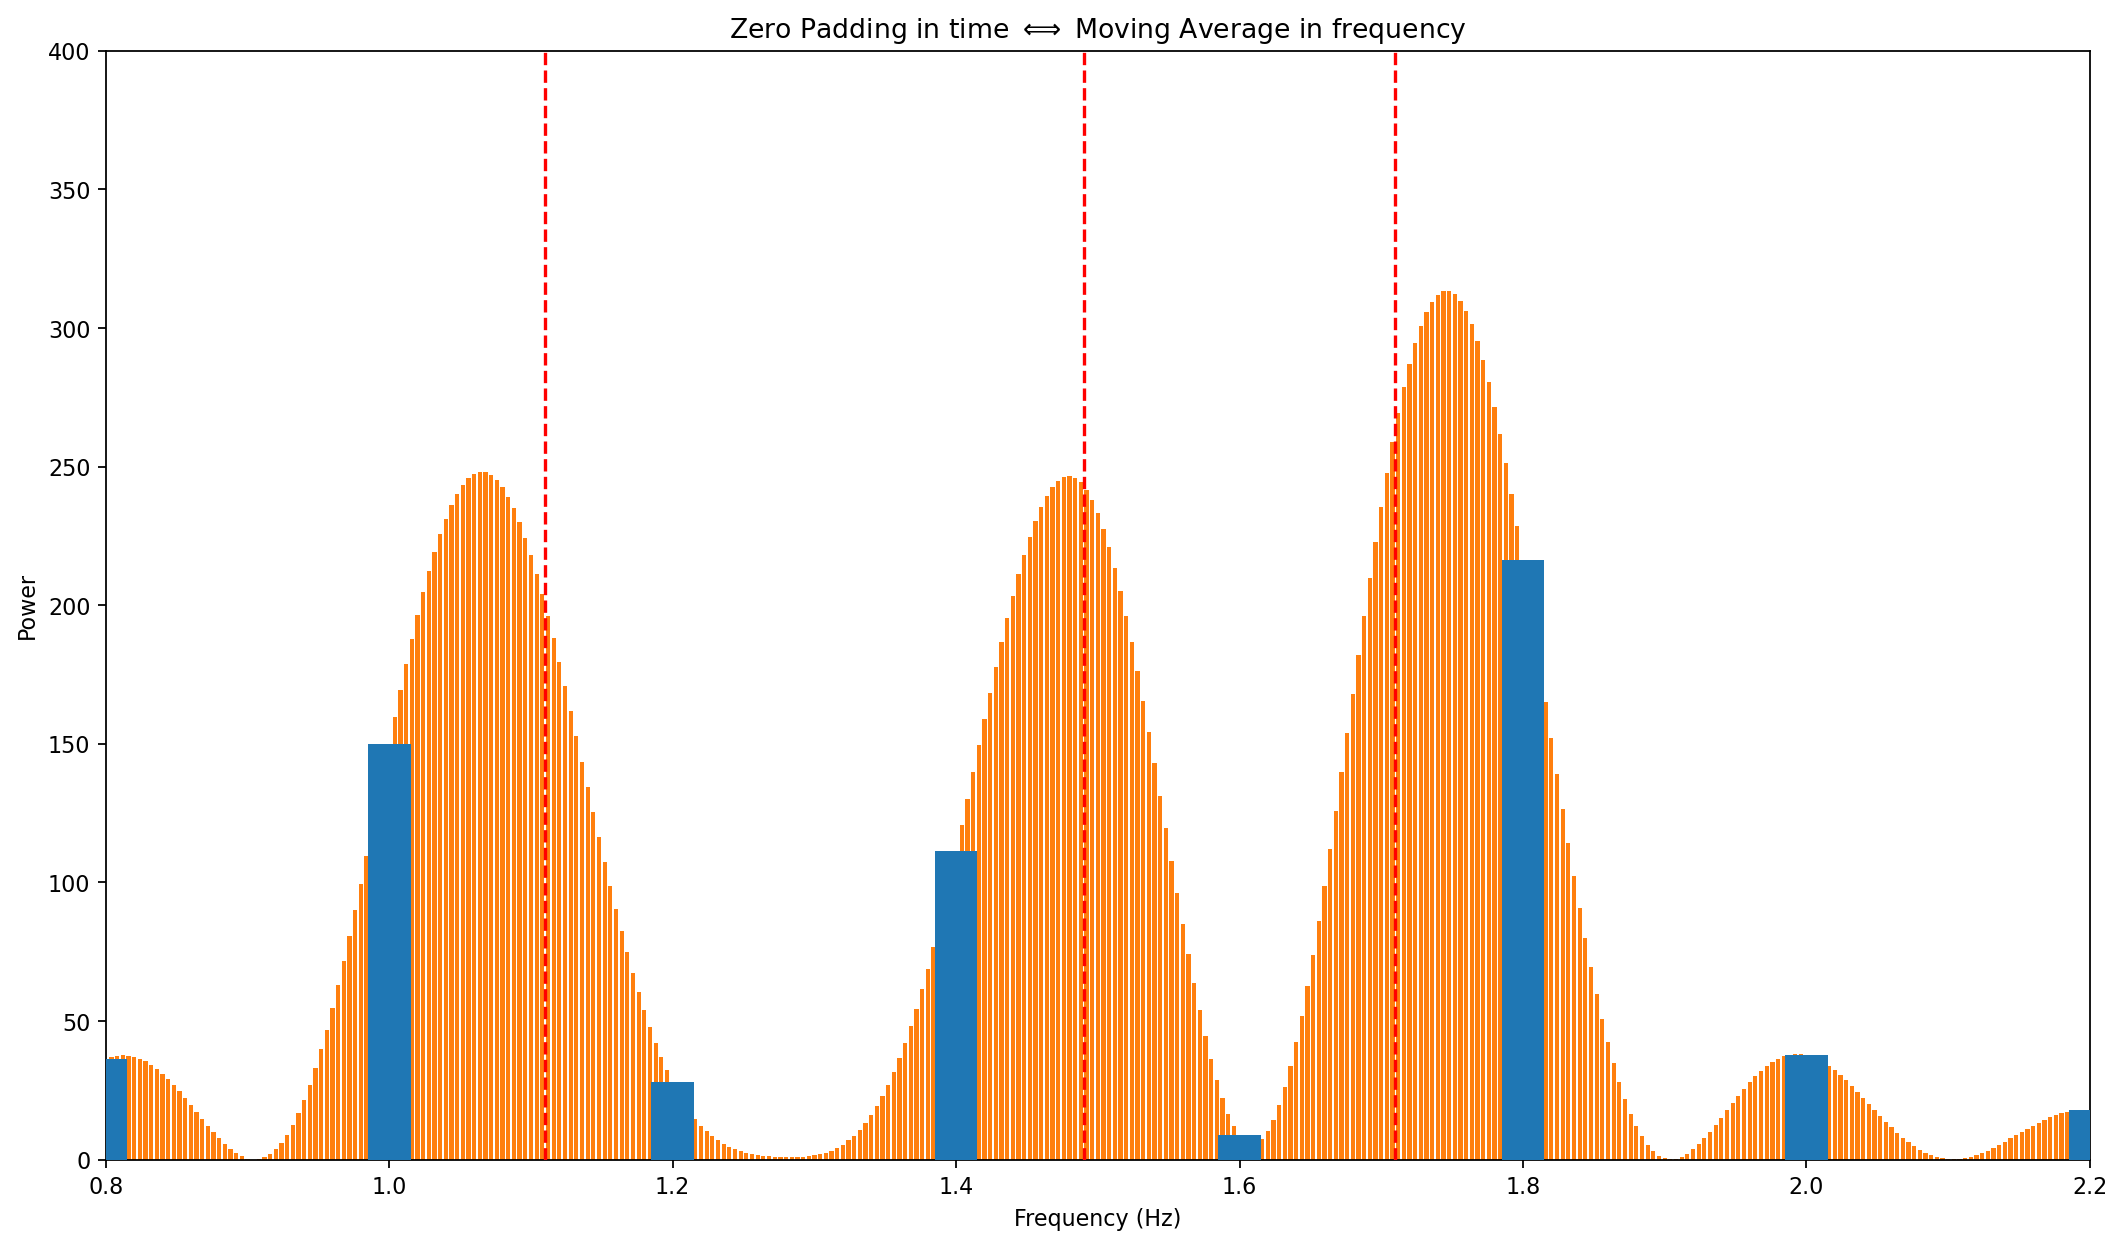

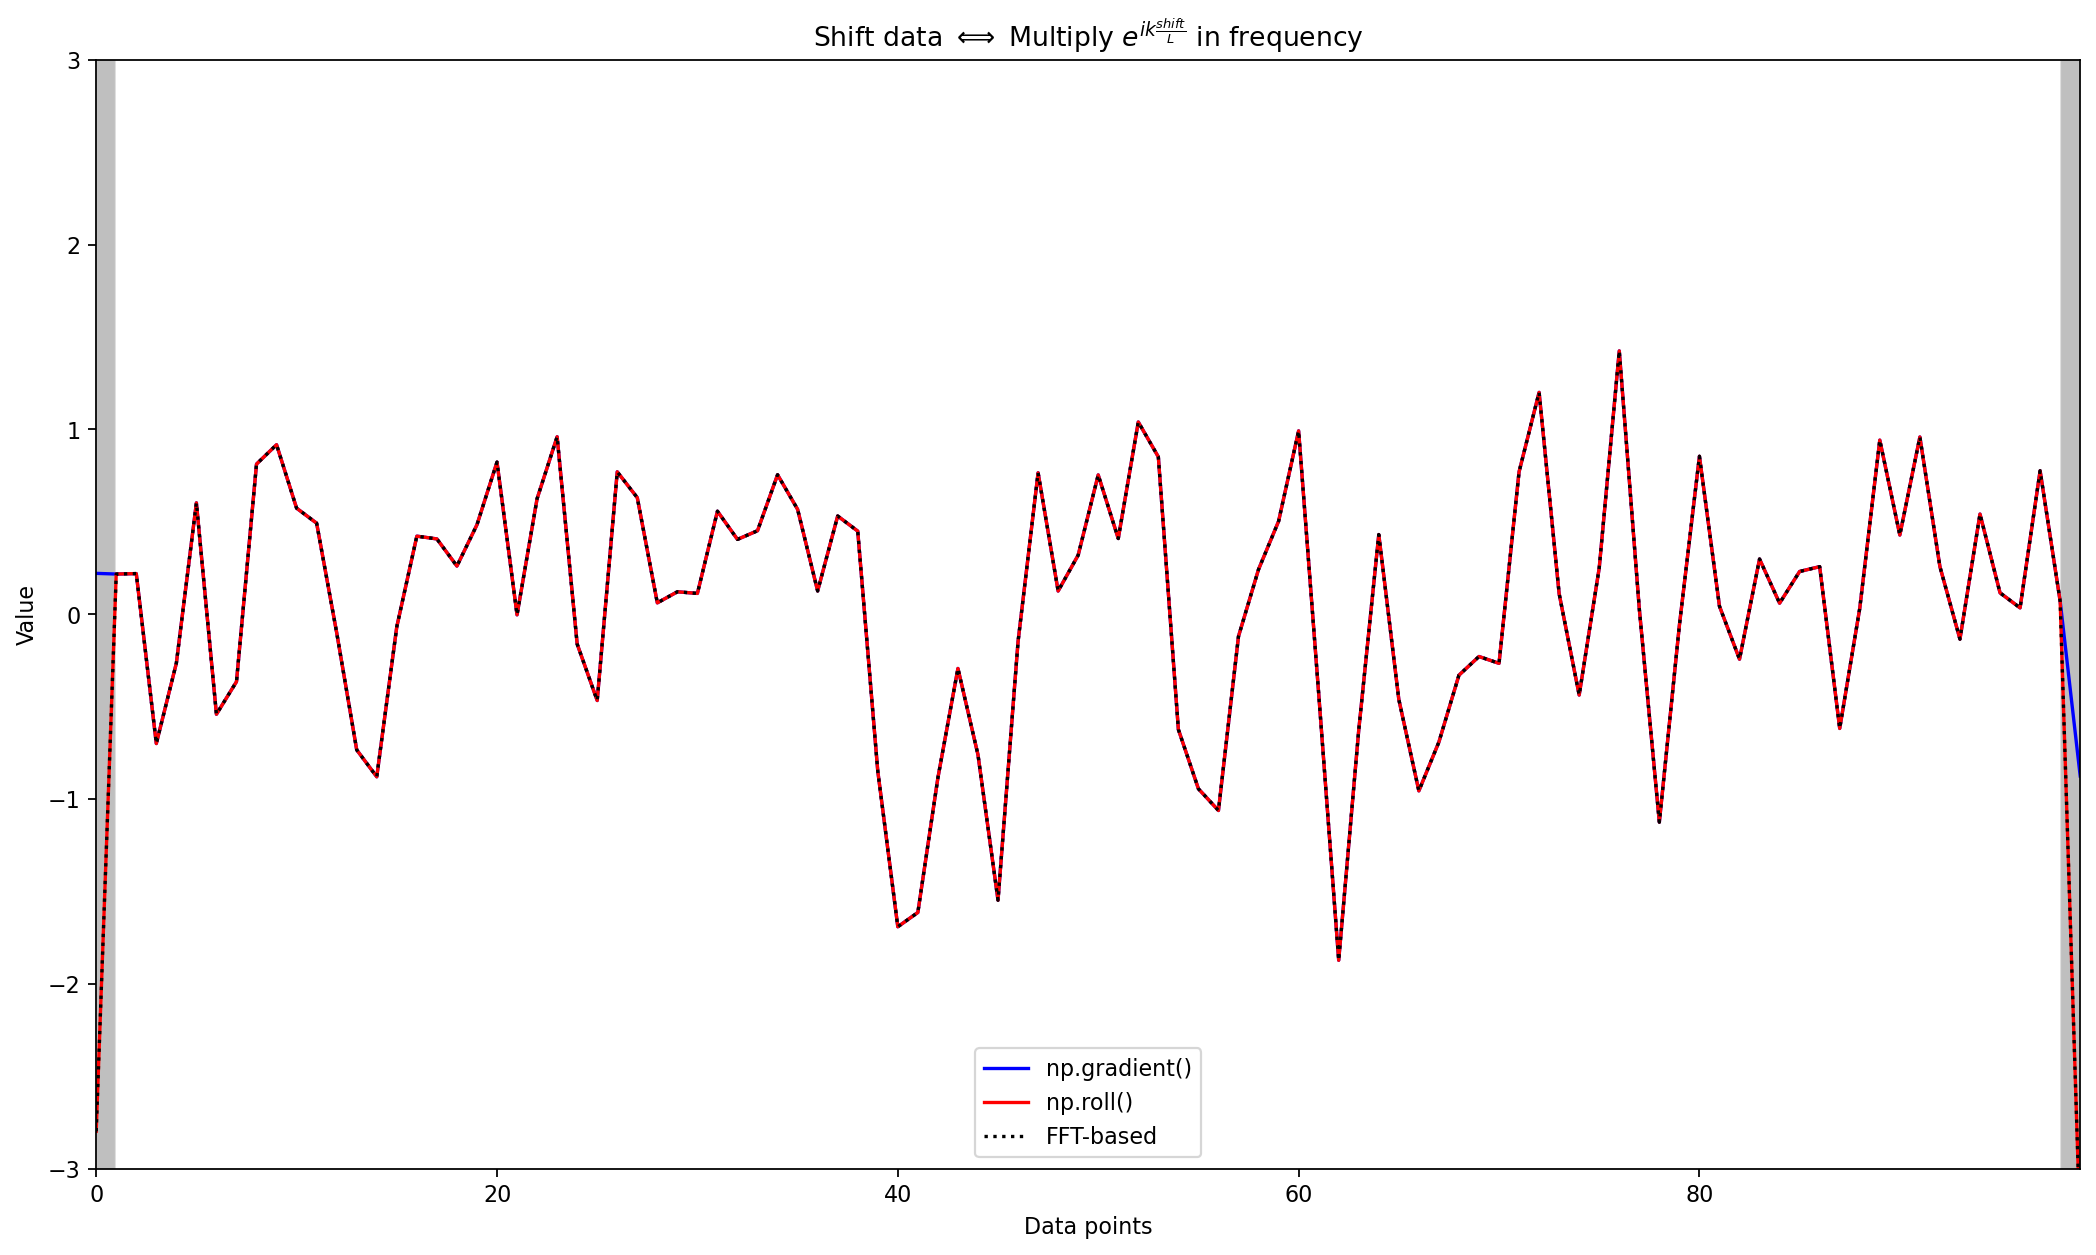

Spectral-without-filter      , L2 Norm =     830.82
Spectral-with-filter         , L2 Norm =     153.17
2nd Central Finite Difference, L2 Norm =   59488.85


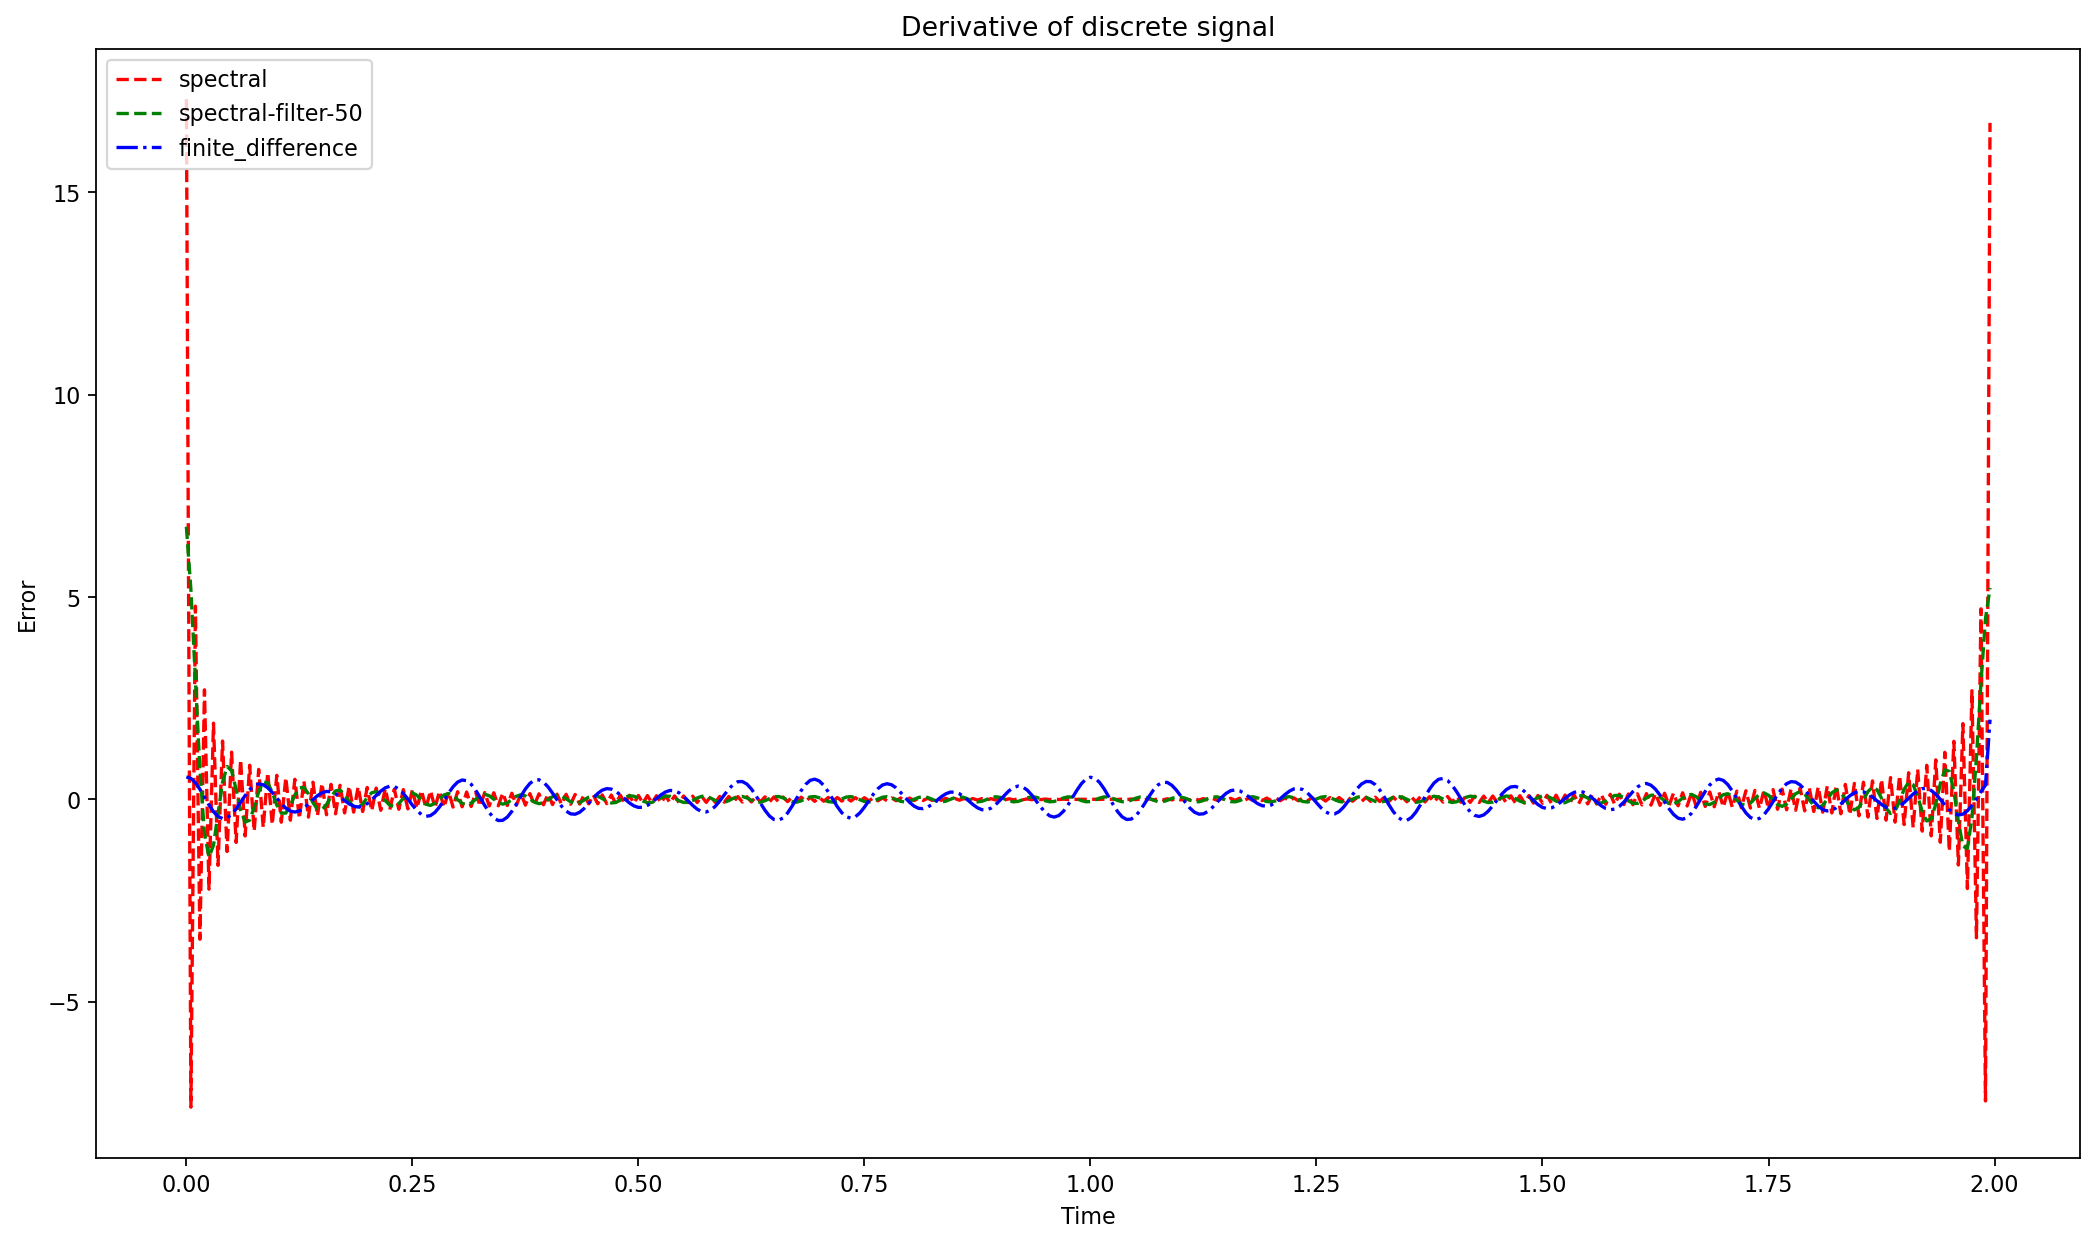

In [1652]:
demo = Demonstration_FourierAnalysis()
demo.display_power_phase_spectrum()
demo.display_aliasing()
demo.display_spectral_leakage()
demo.display_convolution()
demo.display_zero_padding()
demo.display_interpolation()
demo.display_derivative()